In [45]:
import pandas as pd
import numpy as np

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

In [47]:
df = pd.read_csv('df_1.csv', index_col=0)
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율
0,동대문구,2022-12-31,84.97,11,2003.0,2022,76500,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
1,구로구,2022-12-31,59.88,4,2011.0,2022,85000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
2,노원구,2022-12-31,41.30,12,1988.0,2022,39000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
3,동대문구,2022-12-31,59.98,12,2011.0,2022,80000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
4,송파구,2022-12-31,100.82,1,1988.0,2022,185000,NaN,2022-12,4.10,77.2,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560753,구로구,2016-01-01,84.85,18,1998.0,2016,30500,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560754,노원구,2016-01-01,59.82,7,2005.0,2016,30800,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560755,서초구,2016-01-01,134.36,12,2005.0,2016,94000,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3
560756,양천구,2016-01-01,49.99,2,2000.0,2016,21000,NaN,2016-01,0.34,26.9,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3


### 건물나이 컬럼 생성(연도 - 건축년도) 및 건물나이 결측치 6행 삭제

In [48]:
# 건물나이 컬럼생성
df['건물나이'] = df['연도'] - df['건축년도']

In [49]:
df['건물나이']

0         19.0
1         11.0
2         34.0
3         11.0
4         34.0
          ... 
560753    18.0
560754    11.0
560755    11.0
560756    16.0
560757    25.0
Name: 건물나이, Length: 560758, dtype: float64

In [50]:
# 결측치 확인
df['건물나이'].isnull().sum()

6

In [51]:
# 결측치를 포함하는 행 제거
df = df.dropna(subset=['건물나이'])

### Close 결측치 채우기

In [52]:
# 시계열로 변환
df['계약일_x'] = pd.to_datetime(df['계약일_x'])

In [53]:
df = df.sort_values(by='계약일_x')

In [54]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
560757,노원구,2016-01-01,39.96,10,1991.0,2016,18000,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
560738,성동구,2016-01-01,75.37,10,1990.0,2016,55200,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
560739,금천구,2016-01-01,84.83,3,2002.0,2016,36800,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
560740,은평구,2016-01-01,101.97,9,2010.0,2016,67600,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
560741,노원구,2016-01-01,84.59,10,1990.0,2016,30300,NaN,2016-01,0.34,...,"9,894",1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,송파구,2022-12-31,84.71,11,1988.0,2022,138000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
20,송파구,2022-12-31,84.90,24,2008.0,2022,172000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
21,동대문구,2022-12-31,84.87,33,0.0,2022,90452,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0
11,양천구,2022-12-31,64.02,5,1996.0,2022,37000,NaN,2022-12,4.10,...,"3,698",3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


In [55]:
df['Close'].isnull().sum()

167736

In [56]:
df['Close'] = df['Close'].fillna(method='ffill')

In [57]:
# 2016년 이전에 있던 종가는 2015-12-30일의 종가인 1961로 채우기
df['Close'].isnull().sum()

116

In [58]:
# 채우기
df['Close'].fillna(1961.310059, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560752 entries, 560757 to 0
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  560752 non-null  object        
 1   계약일_x                 560752 non-null  datetime64[ns]
 2   건물면적(㎡)               560752 non-null  float64       
 3   층                     560752 non-null  int64         
 4   건축년도                  560752 non-null  float64       
 5   연도                    560752 non-null  int64         
 6   물건금액(만원)              560752 non-null  int64         
 7   Close                 560752 non-null  float64       
 8   월                     560752 non-null  object        
 9   FEDFUNDS              560752 non-null  float64       
 10  국제유가(Dubai) (US$/배럴)  560752 non-null  float64       
 11  부동산 거래량               560752 non-null  object        
 12  국고채?3년(평균)            560752 non-null  float64       
 13 

### 부동산 거래량 ,지우고 type int64로 바꾸기

In [60]:
df['부동산 거래량'].value_counts()

14,446    16443
19,187    15787
34,199    15780
14,388    15430
17,372    14712
          ...  
6,529      1532
7,852      1369
5,791      1331
3,698       852
3,933       734
Name: 부동산 거래량, Length: 84, dtype: int64

In [61]:
# ,지우기
df['부동산 거래량'] = df['부동산 거래량'].str.replace(',', '')

In [62]:
# int로 변환
df = df.astype({'부동산 거래량' : 'int'})

In [63]:
df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
560757,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,25.0
560738,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
560739,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,14.0
560740,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,6.0
560741,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.50,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,34.0
20,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,14.0
21,동대문구,2022-12-31,84.87,33,0.0,2022,90452,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,2022.0
11,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.3,4.02,3.24,3.25,NaN,26.0


In [64]:
df.reset_index(drop=True, inplace=True)

In [65]:
df.head(1)

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,83.3,25.0


In [66]:
# 수치형만 남긴 df1생성
df1 = df.drop(columns = ['건축년도', '연도', '월', '계약일_x', '자치구명'])

In [67]:
# 타겟 변수 마지막으로 이동
target_column = '물건금액(만원)'  # 이동시킬 열 이름
df1 = df1[[col for col in df1.columns if col != target_column] + [target_column]]

In [68]:
df1.head(1)

,건물면적(㎡),층,Close,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이,물건금액(만원)
0,39.96,10,1961.310059,0.34,26.9,9894,1.63,1.77,2.03,2.1,1.67,1.49,1.5,83.3,25.0,18000


In [69]:
df1.columns

Index(['건물면적(㎡)', '층', 'Close', 'FEDFUNDS', '국제유가(Dubai) (US$/배럴)', '부동산 거래량',
       '국고채?3년(평균)', '국고채?5년(평균)', '국고채?10년(평균)', '회사채?3년(평균)', 'CD?91물(평균)',
       '콜금리(1일물,평균)', '기준금리', 'GDP대비가계부채비율', '건물나이', '물건금액(만원)'],
      dtype='object')

In [70]:
# Person 상관계수
cols = ['건물면적(㎡)', '층', 'Close', 'FEDFUNDS', '국제유가(Dubai) (US$/배럴)', '부동산 거래량',
       '국고채?3년(평균)', '국고채?5년(평균)', '국고채?10년(평균)', '회사채?3년(평균)', 'CD?91물(평균)',
       '콜금리(1일물,평균)', '기준금리', 'GDP대비가계부채비율', '건물나이', '물건금액(만원)']

corr = df1[cols].corr(method = 'pearson')
corr

,건물면적(㎡),층,Close,FEDFUNDS,국제유가(Dubai) (US$/배럴),부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이,물건금액(만원)
건물면적(㎡),1.000000,0.110825,-0.049692,0.011339,-0.068908,0.029574,-0.042157,-0.045204,-0.043432,-0.061568,-0.017156,-0.001028,-0.005276,-0.083179,-0.013536,0.574886
층,0.110825,1.000000,-0.000523,0.009153,0.003722,-0.012943,0.005377,0.004343,0.003134,0.002298,0.006905,0.007865,0.007993,-0.005159,0.092785,0.159205
Close,-0.049692,-0.000523,1.000000,-0.194427,0.517140,-0.115070,0.219956,0.346394,0.428049,0.329356,-0.326415,-0.377699,-0.315389,0.653296,-0.084716,0.193743
FEDFUNDS,0.011339,0.009153,-0.194427,1.000000,0.384783,-0.313128,0.456041,0.385119,0.303248,0.306216,0.701527,0.740738,0.703423,-0.150573,-0.021360,-0.031337
국제유가(Dubai) (US$/배럴),-0.068908,0.003722,0.517140,0.384783,1.000000,-0.471967,0.729826,0.746577,0.707544,0.684885,0.388567,0.332706,0.384594,0.548934,-0.081745,0.158476
부동산 거래량,0.029574,-0.012943,-0.115070,-0.313128,-0.471967,1.000000,-0.649023,-0.614218,-0.581311,-0.438567,-0.585234,-0.595250,-0.620038,0.021040,-0.034947,0.000659
국고채?3년(평균),-0.042157,0.005377,0.219956,0.456041,0.729826,-0.649023,1.000000,0.983961,0.946394,0.871556,0.756883,0.688366,0.744450,0.078782,-0.010128,0.003329
국고채?5년(평균),-0.045204,0.004343,0.346394,0.385119,0.746577,-0.614218,0.983961,1.000000,0.985972,0.904275,0.649950,0.569670,0.631415,0.161864,-0.021396,0.027082
국고채?10년(평균),-0.043432,0.003134,0.428049,0.303248,0.707544,-0.581311,0.946394,0.985972,1.000000,0.885783,0.558735,0.473237,0.537727,0.172737,-0.017785,0.027247
회사채?3년(평균),-0.061568,0.002298,0.329356,0.306216,0.684885,-0.438567,0.871556,0.904275,0.885783,1.000000,0.540604,0.411735,0.474525,0.379761,-0.054996,0.085657


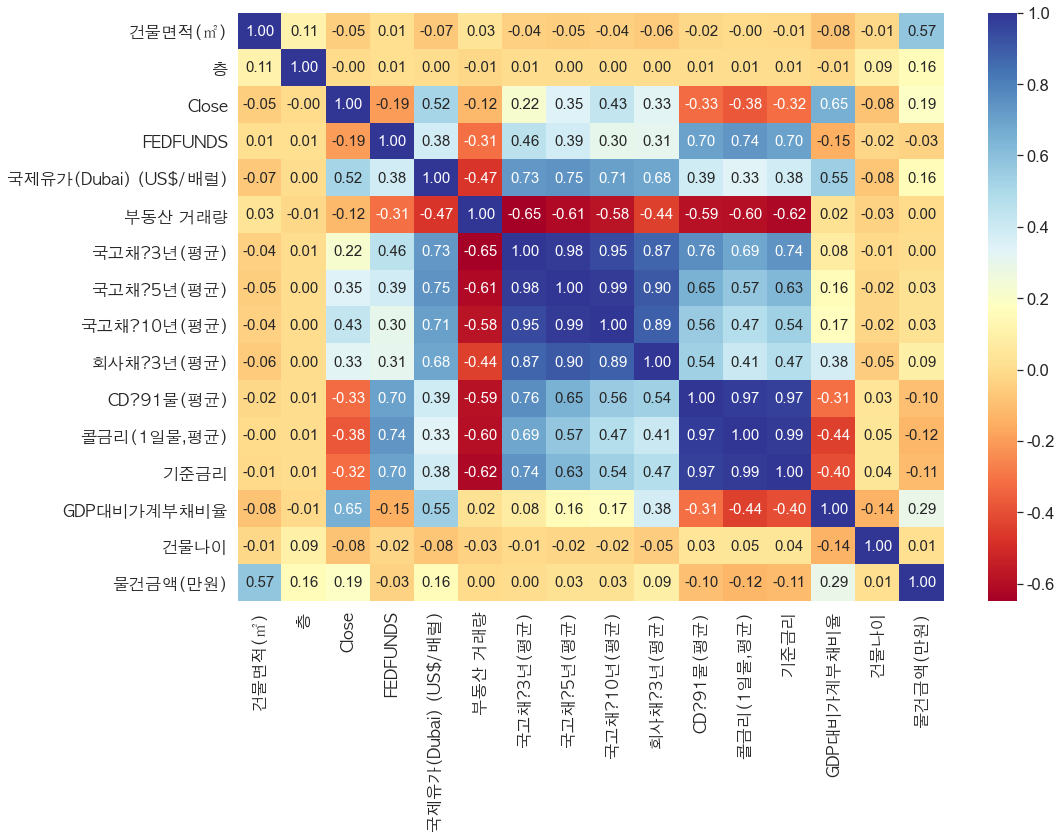

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
# heatmap (seaborn)
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560752 entries, 0 to 560751
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   자치구명                  560752 non-null  object        
 1   계약일_x                 560752 non-null  datetime64[ns]
 2   건물면적(㎡)               560752 non-null  float64       
 3   층                     560752 non-null  int64         
 4   건축년도                  560752 non-null  float64       
 5   연도                    560752 non-null  int64         
 6   물건금액(만원)              560752 non-null  int64         
 7   Close                 560752 non-null  float64       
 8   월                     560752 non-null  object        
 9   FEDFUNDS              560752 non-null  float64       
 10  국제유가(Dubai) (US$/배럴)  560752 non-null  float64       
 11  부동산 거래량               560752 non-null  int64         
 12  국고채?3년(평균)            560752 non-null  float64       
 13 

In [116]:
train_df = df[df['연도'] < 2022]
train_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,25.0
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,26.0
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,14.0
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,6.0
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,83.3,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519715,중구,2021-12-31,40.65,6,2018.0,2021,45500,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,3.0
519716,송파구,2021-12-31,84.43,5,2016.0,2021,168000,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,5.0
519717,강동구,2021-12-31,94.74,6,1999.0,2021,119500,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,22.0
519718,강서구,2021-12-31,59.79,4,2016.0,2021,123000,2977.649902,2021-12,0.08,...,5791,1.80,1.98,2.19,2.41,1.27,1.01,1.0,NaN,5.0


In [117]:
train_df['월'] = pd.to_datetime(train_df['월'])

In [118]:
# 같은 날짜에 대해 첫 번째 값들만 추출
first_values = train_df.groupby('월').first()

In [119]:
train_df_first = first_values.reset_index()

In [120]:
train_df_first

,월,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
0,2016-01-01,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.50,83.3,25.0
1,2016-02-01,성동구,2016-02-01,62.41,13,1989.0,2016,35000,1924.819946,0.38,...,9584,1.47,1.59,1.83,1.95,1.64,1.49,1.50,NaN,27.0
2,2016-03-01,동작구,2016-03-01,84.98,6,2012.0,2016,71900,1916.660034,0.36,...,12628,1.50,1.61,1.85,1.98,1.63,1.49,1.50,NaN,4.0
3,2016-04-01,구로구,2016-04-01,16.92,17,2012.0,2016,13000,1973.569946,0.37,...,13526,1.47,1.57,1.81,1.94,1.61,1.49,1.50,84.3,4.0
4,2016-05-01,성북구,2016-05-01,84.96,17,0.0,2016,55445,1994.150024,0.37,...,15668,1.46,1.55,1.79,1.91,1.58,1.49,1.50,NaN,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2021-08-01,노원구,2021-08-01,53.66,6,2002.0,2021,48000,3202.320068,0.09,...,16249,1.41,1.65,1.91,1.84,0.77,0.56,0.75,NaN,19.0
68,2021-09-01,노원구,2021-09-01,59.90,3,1999.0,2021,64400,3207.020020,0.08,...,13997,1.52,1.79,2.06,1.95,0.98,0.77,0.75,NaN,22.0
69,2021-10-01,강동구,2021-10-01,59.99,11,2011.0,2021,129000,3019.179932,0.08,...,10513,1.84,2.15,2.40,2.30,1.08,0.74,0.75,105.8,10.0
70,2021-11-01,동작구,2021-11-01,59.89,5,1993.0,2021,100000,2978.939941,0.08,...,7852,1.95,2.17,2.36,2.49,1.17,0.80,1.00,NaN,28.0


In [121]:
train_df_first = train_df_first[['월', 'GDP대비가계부채비율']]

In [122]:
train_df_first['GDP대비가계부채비율'] = train_df_first['GDP대비가계부채비율'].interpolate(method='linear')

In [123]:
merged_df = pd.merge(train_df, train_df_first, on='월', how='left')

In [126]:
merged_df.loc[merged_df['계약일_x']=='2020-11-01']

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율_x,건물나이,GDP대비가계부채비율_y
463392,구로구,2020-11-01,83.97,2,2006.0,2020,38000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,14.0,103.466667
463393,은평구,2020-11-01,114.98,3,2015.0,2020,117500,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,5.0,103.466667
463394,구로구,2020-11-01,47.10,1,1996.0,2020,14000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,24.0,103.466667
463395,송파구,2020-11-01,136.24,7,2006.0,2020,125000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,14.0,103.466667
463396,송파구,2020-11-01,84.82,16,2017.0,2020,122000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,3.0,103.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463451,서초구,2020-11-01,136.87,2,2004.0,2020,150000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,16.0,103.466667
463452,강남구,2020-11-01,123.28,12,1984.0,2020,260000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,36.0,103.466667
463453,구로구,2020-11-01,38.92,3,1996.0,2020,15500,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,24.0,103.466667
463454,송파구,2020-11-01,125.79,12,1988.0,2020,158000,2267.149902,2020-11-01,0.09,...,0.97,1.3,1.61,2.25,0.66,0.49,0.5,NaN,32.0,103.466667


In [128]:
merged_df = merged_df.loc[merged_df['연도']!=2021]

In [130]:
merged_df.drop('GDP대비가계부채비율_x', axis = 1, inplace=True)

In [131]:
merged_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,25.0,83.300000
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,14.0,83.300000
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,6.0,83.300000
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477316,성동구,2020-12-31,84.30,3,2016.0,2020,171000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333
477317,성북구,2020-12-31,59.98,2,2001.0,2020,47000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333
477318,용산구,2020-12-31,84.21,7,2011.0,2020,175000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333
477319,은평구,2020-12-31,84.69,1,2004.0,2020,59700,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333


In [137]:
# 전체(강남 & 비강남 모두) DF
train_df_all = merged_df.copy()

In [138]:
train_df_all

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,건물나이,GDP대비가계부채비율_y
0,노원구,2016-01-01,39.96,10,1991.0,2016,18000,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,25.0,83.300000
1,성동구,2016-01-01,75.37,10,1990.0,2016,55200,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
2,금천구,2016-01-01,84.83,3,2002.0,2016,36800,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,14.0,83.300000
3,은평구,2016-01-01,101.97,9,2010.0,2016,67600,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,6.0,83.300000
4,노원구,2016-01-01,84.59,10,1990.0,2016,30300,1961.310059,2016-01-01,0.34,...,9894,1.63,1.77,2.03,2.10,1.67,1.49,1.5,26.0,83.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477316,성동구,2020-12-31,84.30,3,2016.0,2020,171000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,4.0,103.933333
477317,성북구,2020-12-31,59.98,2,2001.0,2020,47000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,19.0,103.933333
477318,용산구,2020-12-31,84.21,7,2011.0,2020,175000,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,9.0,103.933333
477319,은평구,2020-12-31,84.69,1,2004.0,2020,59700,2873.469971,2020-12-01,0.09,...,30495,0.97,1.32,1.68,2.21,0.66,0.51,0.5,16.0,103.933333


In [140]:
# 비강남 Train DF
train_df_no_kn = train_df_all.loc[~((train_df_all['자치구명']=='강남구')|(train_df_all['자치구명']=='서초구')|(train_df_all['자치구명']=='송파구'))]

- Test 결측치 대체 : 직전분기값 대체

In [141]:
test_df = df[df['연도'] >= 2021]
test_df

,자치구명,계약일_x,건물면적(㎡),층,건축년도,연도,물건금액(만원),Close,월,FEDFUNDS,...,부동산 거래량,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리,GDP대비가계부채비율,건물나이
477321,양천구,2021-01-01,55.93,6,2002.0,2021,52000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,19.0
477322,양천구,2021-01-01,49.99,7,2000.0,2021,52800,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,21.0
477323,강동구,2021-01-01,13.02,15,2020.0,2021,24000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,1.0
477324,서초구,2021-01-01,59.93,25,2013.0,2021,120000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,8.0
477325,강동구,2021-01-01,13.02,7,2020.0,2021,23000,2873.469971,2021-01,0.09,...,20938,0.98,1.32,1.73,2.14,0.68,0.49,0.50,104.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560747,송파구,2022-12-31,84.71,11,1988.0,2022,138000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,34.0
560748,송파구,2022-12-31,84.90,24,2008.0,2022,172000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,14.0
560749,동대문구,2022-12-31,84.87,33,0.0,2022,90452,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,2022.0
560750,양천구,2022-12-31,64.02,5,1996.0,2022,37000,2236.399902,2022-12,4.10,...,3698,3.63,3.59,3.54,5.30,4.02,3.24,3.25,NaN,26.0


In [143]:
# test_df['GDP대비가계부채비율']직전 값으로 결측값 대체
test_df['GDP대비가계부채비율'] = test_df['GDP대비가계부채비율'].fillna(method='ffill')

# 결과 출력
print(test_df['GDP대비가계부채비율'])

477321    104.4
477322    104.4
477323    104.4
477324    104.4
477325    104.4
          ...  
560747    105.0
560748    105.0
560749    105.0
560750    105.0
560751    105.0
Name: GDP대비가계부채비율, Length: 83431, dtype: float64


In [144]:
test_df[['계약일_x','GDP대비가계부채비율']]

,계약일_x,GDP대비가계부채비율
477321,2021-01-01,104.4
477322,2021-01-01,104.4
477323,2021-01-01,104.4
477324,2021-01-01,104.4
477325,2021-01-01,104.4
...,...,...
560747,2022-12-31,105.0
560748,2022-12-31,105.0
560749,2022-12-31,105.0
560750,2022-12-31,105.0


In [146]:
# 타겟 변수 마지막으로 이동
target_column = '물건금액(만원)'  # 이동시킬 열 이름
test_df = test_df[[col for col in df1.columns if col != target_column] + [target_column]]